# Numerical Analysis - 8
###### Rafael Barsotti

#### 1) Implemente o método de Euler para resolver o problema de valor inicial (PVI) $x′ = x^{1/3}$, $x(0) = 0$. O que acontece ? (Observe que esse problema apresenta mais de uma solução analítica.)

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m

In [11]:
# Questão 1 - Método de Euler

#Função f(x,t)
def f1(x):
    y = x**(1/3)
    return y

# Método de Euler
def euler_method(a,b,f1,x0,t0,n):
    D = np.array([[0,x0]])
    h = (b-a)/n
    t = t0
    x = x0
    for i in range(n):
        x = x + h*f1(x)
        t = t + h
        D = np.append(D,[[t,x]], axis = 0)
    return D

# Plot EDO 
def edo_plot(D):
    x = D[:,0]
    y = D[:,1]
    plt.plot(x,y, 'ro', color = 'b')
    plt.show()
    
def euler_plot(D):
    x = D[:,0]
    y = D[:,1]
    plt.plot(x,y, color = 'b')
    plt.show()

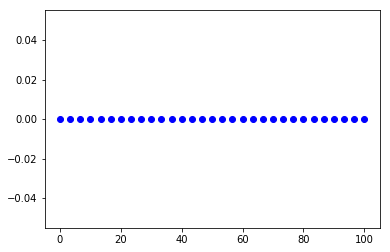

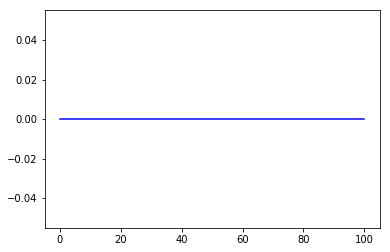

In [15]:
a = euler_method(0,100,f1,0,0,30)
edo_plot(a)
euler_plot(a)

#### 2) Considere o método de Heun, também conhecido como método dos trapézios para EDO’s ou método de Euler melhorado, dado por:

#### $\overline{x}(t + h) = x(t) + hf(t, x(t))$

#### $x(t + h) = x(t) + \frac{h}{2}[f(t, x(t)) + f(t + h, \overline{x}(t + h))]$

#### (a) Utilize o método de Heun (na mão!) para obter uma solução para o PVI $x′ = −x + t + \frac{1}{2}$, $x(0) = 1$ no intervalo $[0, 1]$ com $h = 0.1$. Interpolando os pontos por um spline de ordem 1 obtenha a chamada aproximação poligonal de Euler.

In [8]:
#Questão 2a - Método de Heun

#Função f(x,t)
def f2(x,t):
    y = -x + t + 1/2
    return y

# Método de Heun
def heun_method(f2,n):
    t = 0
    x = 1
    h = 0.1
    D = np.array([[t,x]])
    for i in range(n):
        xbarra = x + h*f2(x,t)
        x = x + h/2*(f2(x,t)+f2(xbarra,t)
        t = t + h
        print(t,xbarra,x)

In [10]:
heun_method(f2,10)

0 0.95 0.9525
1 0.91725 0.9190125
2 0.89711125 0.8982063125
3 0.8883856812500001 0.8888767128125
4 0.88998904153125 0.8899334250953125
5 0.9009400825857812 0.9003897497112578
6 0.920350774740132 0.9193527234886884
7 0.9474174511398195 0.946014214757263
8 0.9814127932815366 0.979642864355323
9 1.0216785779197908 1.0195767922415673


#### (b) Implemente o método de Heun para obter uma solução para o PVI $x′ = −100x^2$ , $x(0) = 1$ com $h = 0.1$. Agora substitua $\overline{x}(t + h)$ por $x(t + h)$. Explique o que acontece.

In [50]:
#Questão 2b - Método de Heun

#Função f(x,t)
def f2(x):
    y = -100*(x**2)
    return y

# Método de Heun
def heun_method(f2,n):
    t = 0
    x = 1
    h = 0.1
    D = np.array([[t,x]])
    for i in range(n):
        xbarra = x + h*f2(x)
        x = x + h/2*(f2(x)+f2(xbarra))
        t = t + h
        D = np.append(D,[[t,x]], axis = 0)
    return D

#### 3) Mostre que o método de Heun é um método de Runge-Kutta. Qual é a ordem?

#### 4) Considere o PVI $x′ = (tx)^3 −(\frac{x}{t})^2$, $x(1) = 1$. Utilize (na mão) os métodos de Taylor e Runge-Kutta de ordem 2 para obter aproximações para $x(1 + h)$ com $h = 0.1$. Compare as respostas.

#### 5a) Resolva o PVI $x′ = 10x − 5t^2 + 11t − 1$, $x(0) = 0$. Com $h = 2^{−8}$, obtenha uma solução computacional do PVI no intervalo $[0, 3]$ utilizando o RK4 descrito em sala. Faça um gráfico com a solução analítica e a aproximação poligonal obtida utilizando os pontos obtidos pelo RK4.

In [54]:
#Questão 5a - Método de RK4

# Função f(x,t)
def f3(x,t):
    y = 10*x - 5*(t**2) + 11*t - 1
    return y

def f3_analytic(x,n,h):
    t = 0
    c1 = x
    D = np.array([[t,x]])
    for i in range(n):
        t = t + h
        x = c1*m.e**(10*t) + (t**2)/2 - t
        D = np.append(D,[[t,x]], axis = 0)
    return D

# Método RK4
def rk4_method(f3,x,t,h,n):
    D = np.array([[t,x]])
    for i in range(n):
        K1 = h*f3(x,t)
        K2 = h*f3(x+(1/2*K1),t+(h*1/2))
        K3 = h*f3(x+(1/2*K2),t+(h*1/2))
        K4 = h*f3(x+K3,t+h)
        x = x + 1/6*(K1 + 2*K2 + 2*K3 + K4)
        t = t + h
        D = np.append(D,[[t,x]], axis = 0)
    return D

def erro_global(d1,d2):
    e = d2[:,1] - d1[:,1]
    error = np.amax(e)
    print("O erro global é {}".format(error))

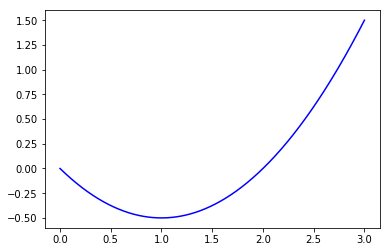

In [52]:
# Solucao Analitica com c = 0
D = f3_analytic(0,768,2**-8)
euler_plot(D)

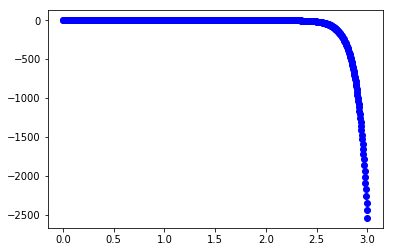

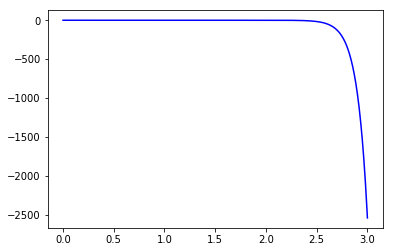

In [21]:
# Plot RK4
h = 2**-8
d = rk4_method(f3,0,0,h,768)
edo_plot(d)
euler_plot(d)

#### 5b) Refaça o item anterior substituindo a condição inicial por $x(0) = \epsilon$, com $\epsilon = 0.0001$. Obtenhao erro global, isto é, a máxima distância entre a solução analítica e a aproximação numérica.


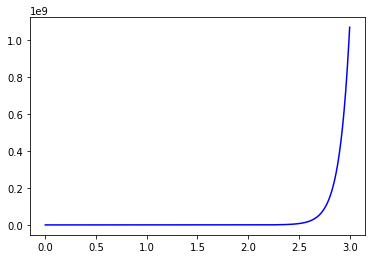

In [56]:
# Plot Solucao Analitica c1 = 0.0001
D = f3_analytic(0.0001,768,2**-8)
euler_plot(D)

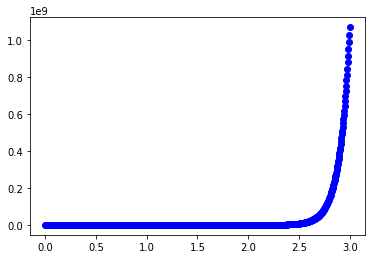

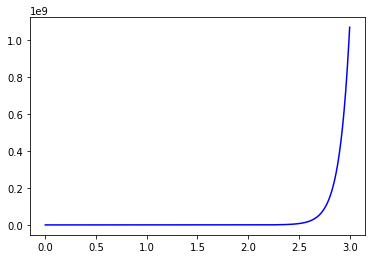

In [22]:
# Plot RK4
h = 2**-8
e = 0.0001
d = rk4_method(f3,e,0,h,768)
edo_plot(d)
euler_plot(d)

In [55]:
erro_global(d,D)

O erro global é -0.0001


#### 6) Determine se as soluções da EDO $x′ = t(x^3−6x^2+15x)$ convergem ou divergem uma das outras.